In [88]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [89]:
df = pd.read_csv('Train.csv')
df.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,target
0,0.293416,-0.945599,-0.421105,0.406816,0.525662,-82.154667
1,-0.836084,-0.189228,-0.776403,-1.053831,0.597997,-48.897960
2,0.236425,0.132836,-0.147723,0.699854,-0.187364,77.270371
3,0.175312,0.143194,-0.581111,-0.122107,-1.292168,-2.988581
4,-1.693011,0.542712,-2.798729,-0.686723,1.244077,-37.596722


In [90]:
Y= np.array([])

for i in df.target.values:
    Y = np.append(Y,i)
    
    


Y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

In [91]:
df =df.drop(['target'],axis=1)

In [92]:
X = df.values
X


array([[ 0.29341624, -0.94559871, -0.42110515,  0.40681602,  0.52566183],
       [-0.83608408, -0.18922804, -0.77640262, -1.05383124,  0.59799685],
       [ 0.23642511,  0.13283602, -0.14772298,  0.69985396, -0.18736416],
       ...,
       [ 1.04417694, -0.89920649,  1.73039905, -1.87105676,  0.44251965],
       [-1.2691729 , -0.00505216,  1.85766873, -1.08036482,  0.73633394],
       [-1.88400025, -0.84942743, -1.45227035,  0.48861308,  1.4595758 ]])

In [93]:
#normalise the data


#u = np.mean(X,axis=0)
#std = np.std(X,axis=0)
#X = (X-u)/std

#d = pd.DataFrame(X)
#d
Y

array([ -82.15466656,  -48.89796018,   77.2703707 , ..., -107.51050797,
        -47.34155781, -115.93900296])

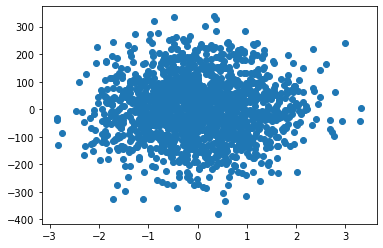

In [94]:
plt.scatter(X[:,4],Y)
plt.show()

In [95]:
# X  - Matrix (m x n m exmples and n features)
# x- vector (Single example with n features)
#applying linear regression with multiple features
ones = np.ones((X.shape[0],1))
X = np.hstack((ones,X))


def hypothesis(x,theta):
    y_ = 0.0
    n = x.shape[0]
    
    for i in range(n):
        y_ += (theta[i]*x[i])
        
    return y_

def error(X,Y,theta):
    e = 0.0
    m = X.shape[0]
    
    for i in range(m):
        y_ = hypothesis(X[i],theta)
        
        e+= (Y[i]- y_)**2
        
        
    return e/m

def gradient(X,Y,theta):
    m,n = X.shape
    
    
    grad = np.zeros((n,))
    
    # for all values of j
    for j in range(n):
        
        #sum over all examples
        
        for i in range(m):
            y_ = hypothesis(X[i],theta)
            
            grad[j] += (y_-Y[i])*X[i][j]
            
    return grad/m


def gradient_descent(X,Y,learning_rate = 0.1,max_echops = 300):
    m,n = X.shape
    theta = np.zeros((n,))
    error_list = []
    
    for i in range(max_echops):
        e = error(X,Y,theta)
        error_list.append(e)
        
        #gradient descent
        grad = gradient(X,Y,theta)
        for j in range(n):
            theta[j] = theta[j] - learning_rate*grad[j]
            
            
    return theta,error_list

In [96]:
theta,error_list = gradient_descent(X,Y)

theta

array([ 4.99096674, 29.68187118, 92.66247759,  8.28062089, 44.76773522,
        2.51916121])

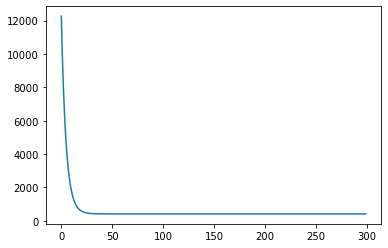

In [97]:
plt.plot(error_list)
plt.show()

In [99]:
#predictions
m = X.shape[0]
y_=[]

for i in range(m):
    
    
    
    
     
    pred = hypothesis(X[i],theta)
    y_.append(pred)
    
y_ = np.array(y_)
y_

array([ -57.87196311,  -89.46019557,   53.95305942, ..., -115.65802541,
        -64.27649688, -116.11442895])

In [100]:
def r2_score(Y,y_):
    num = np.sum((Y-y_)**2)
    denum = np.sum((Y-Y.mean())**2)
    score= (1-num/denum)
    return score*100


In [102]:
r2_score(Y,y_)

96.60939669975616

In [103]:
test =  pd.read_csv('Test.csv')
test

,feature_1,feature_2,feature_3,feature_4,feature_5
0,1.015254,2.076209,-0.266435,-2.418088,-0.980503
1,-0.375021,0.953185,0.626719,0.704406,-0.355489
2,-1.024452,0.962991,-0.407942,-1.861274,0.455201
3,-2.489841,0.544802,0.601219,-0.607021,-1.314286
4,-0.384675,-0.833624,1.358552,-0.547932,0.411925
...,...,...,...,...,...
395,-0.436959,-0.575844,-1.620908,-0.222588,1.086013
396,-0.421324,-2.417543,0.876275,0.844565,0.171646
397,0.554728,1.768243,-0.897787,-1.193661,0.340563
398,-1.627172,0.856471,-0.000566,0.629387,0.453382


In [104]:
T = test.values

ones = np.ones((T.shape[0],1))
T = np.hstack((ones,T))



In [105]:
#predictions
m = T.shape[0]
t_=[]

for i in range(m):
    
    
    
    
     
    pred = hypothesis(T[i],theta)
    t_.append(pred)
    
t_ = np.array(t_)
t_


array([ 1.14583689e+02,  1.18012815e+02, -2.17398523e+01, -4.39368985e+01,
       -9.59148984e+01, -4.45074240e+01, -7.55665260e+01,  2.38208355e+01,
        1.73835284e+02,  1.72849290e+02, -1.05402312e+02, -2.08020234e+01,
       -3.91323777e+00,  1.22999186e+02,  4.03078842e+01,  4.57128495e+01,
       -1.89628491e+02,  2.26125454e+01,  1.16410473e+01,  1.36342143e+02,
        6.49162552e+01, -6.19884884e+01, -1.08194679e+02, -7.41212747e+00,
       -5.85239528e+01,  1.18889777e+01,  2.92376400e+01,  1.07687579e+02,
        2.41468563e+01, -2.61050120e+01,  1.10968076e+02, -4.48797096e+01,
        2.16799939e+02, -1.38606052e+01, -2.28603182e+02,  1.54896021e+02,
       -2.22583390e+00,  1.27230344e+01, -3.08307877e+02,  7.71107583e+01,
       -8.12079177e+01, -2.06632925e+02, -2.38762881e+02,  1.34757365e+02,
       -7.37514777e+01,  1.05463702e+02, -3.59074927e+00,  2.06043839e+01,
       -9.80187354e+01, -2.75169049e+01,  1.08159001e+01, -1.74463534e+02,
        6.51557518e+01, -

In [106]:
df = pd.DataFrame(data = t_ ,columns=['target'])

In [107]:
df = df.astype({'target':int}) 

In [109]:
df.to_csv('target1.csv')

In [110]:
e = pd.read_csv('target1.csv')
for i in e.target.values:
    print(type(i))
    
    

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu

In [86]:
df4 = pd.read_csv('sample_submission.csv')
df4

,Id,target
0,0,0
1,1,1
2,2,2
3,3,3
4,4,4
...,...,...
395,395,395
396,396,396
397,397,397
398,398,398


In [87]:
for i in df4.target.values:
    print(type(i))
    

<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'numpy.int64'>
<class 'nu